## Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading csv file
df=pd.read_csv("http://bit.ly/w-data")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


##                                        **Handling Missing Values**

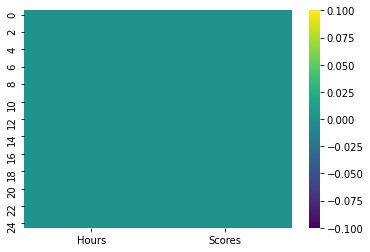

In [3]:
#using heatmap to see if there is any missing value in data set or not 
a=df.isnull()
sns.heatmap(a,cmap="viridis")

# Applying Linear Regression Model

In [4]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [6]:
from sklearn.linear_model import LinearRegression 
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
y_predict=lm.predict(X_test)

# Comparing Actual vs Predicted Scores

In [8]:
df1 = pd.DataFrame({'Actual scores': y_test, 'Predicted scores': y_predict})  
df1 

,Actual scores,Predicted scores
0,17,12.839958
1,54,48.726332
2,30,26.418586
3,62,59.395254
4,27,33.207900
5,60,55.515646
6,86,77.823392
7,47,51.636038


# Visualization

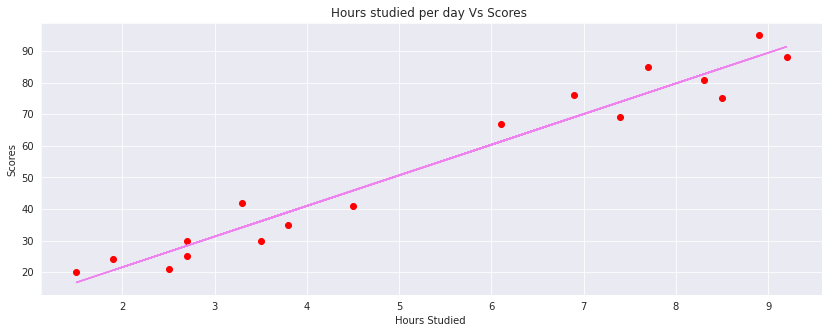

In [9]:
#for training set

sns.set_style("darkgrid")
plt.figure(figsize=(14,5))
plt.scatter(X_train,y_train,color="red")                   
plt.plot(X_train,lm.predict(X_train),color="violet")
plt.title("Hours studied per day Vs Scores ")
plt.xlabel("Hours Studied ")
plt.ylabel("Scores")
plt.show()

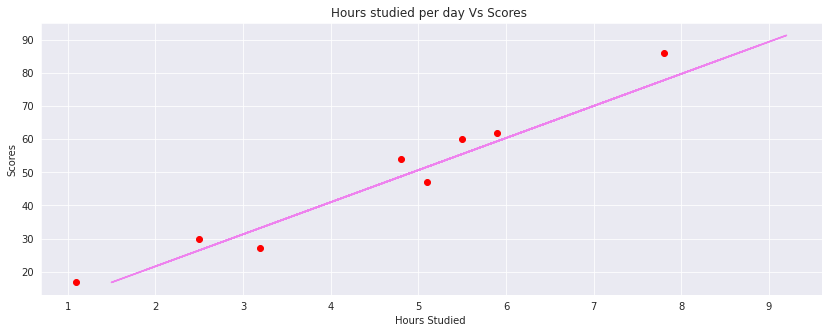

In [10]:
#for test set

sns.set_style("darkgrid")
plt.figure(figsize=(14,5))
plt.scatter(X_test,y_test,color="red")                          
plt.plot(X_train,lm.predict(X_train),color="violet")
plt.title("Hours studied per day Vs Scores ")
plt.xlabel("Hours Studied ")
plt.ylabel("Scores")
plt.show()

# Evaluating the Performance of this Model  

In [11]:
from sklearn import metrics
k=np.sqrt(metrics.mean_squared_error(y_test,y_predict))
print("Square root of mean squared error is ",k)

Square root of mean squared error is  5.144487003895598


In [12]:
#Prediction of score for 9.5 hours study per day

total_hours=np.array([[9.5]]) 
prediction = lm.predict(total_hours)
print("No of Hours studied per day is {}".format(9.5))
print("Predicted Score is {}".format(prediction[0]))

No of Hours studied per day is 9.5
Predicted Score is 94.31172578478683
